####  Required Python libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
DATASET_URL = 'ISCX-URL2016_All.csv'
Y_FEATURE = 'URL_Type_obf_Type'
RANDOM_STATE=42
TEST_SIZE=0.3
MAX_DEPTH=10
MAX_ITER=1000

#### Load the Data

In [ ]:
# for the initial loading of data, do not used the loader.
df = pd.read_csv(DATASET_URL)

#### Explore the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      36707 non-null  int64  
 1   domain_token_count               36707 non-null  int64  
 2   path_token_count                 36707 non-null  int64  
 3   avgdomaintokenlen                36707 non-null  float64
 4   longdomaintokenlen               36707 non-null  int64  
 5   avgpathtokenlen                  36427 non-null  float64
 6   tld                              36707 non-null  int64  
 7   charcompvowels                   36707 non-null  int64  
 8   charcompace                      36707 non-null  int64  
 9   ldl_url                          36707 non-null  int64  
 10  ldl_domain                       36707 non-null  int64  
 11  ldl_path                         36707 non-null  int64  
 12  ldl_filename      

In [ ]:
df.describe()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
count,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36427.000000,36707.000000,36707.000000,36707.000000,36707.000000,...,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,28239.000000,36471.000000,36667.000000,36701.000000
mean,21.908110,2.857439,8.954668,5.401719,9.746016,4.556261,2.857439,14.976517,10.216117,3.363909,...,1.727545,3.600049,2.685237,1.903261,0.722350,0.842443,0.677459,0.715834,0.508212,-0.208900
std,94.280669,0.906562,4.278406,1.986858,4.856580,2.839388,0.906562,13.351315,10.845807,13.447289,...,2.719231,4.783213,4.557171,4.512421,0.048820,0.066251,0.450683,0.411712,0.519695,0.891581
min,0.000000,2.000000,0.000000,1.500000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.419560,0.561913,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,2.000000,6.000000,4.000000,6.000000,3.000000,2.000000,7.000000,5.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.691929,0.795234,0.731621,0.719904,0.000000,-1.000000
50%,0.000000,3.000000,8.000000,5.000000,9.000000,4.100000,3.000000,13.000000,8.000000,0.000000,...,1.000000,1.000000,0.000000,-1.000000,0.723003,0.835752,0.790535,0.785150,0.729292,-1.000000
75%,19.000000,3.000000,11.000000,6.500000,12.000000,5.000000,3.000000,19.000000,12.000000,1.000000,...,3.000000,6.000000,4.000000,3.000000,0.754305,0.884735,0.851410,0.884662,0.910005,0.758695
max,1385.000000,19.000000,68.000000,29.500000,63.000000,105.000000,19.000000,193.000000,142.000000,207.000000,...,24.000000,40.000000,39.000000,40.000000,0.895403,1.000000,0.962479,1.000000,1.000000,1.000000


In [ ]:
df.columns

Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathToken

In [ ]:
df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


In [ ]:
df[Y_FEATURE].unique()

array(['Defacement', 'benign', 'malware', 'phishing', 'spam'],
      dtype=object)

In [ ]:
print(df[Y_FEATURE].value_counts().sort_values(ascending=False))

URL_Type_obf_Type
Defacement    7930
benign        7781
phishing      7586
malware       6712
spam          6698
Name: count, dtype: int64


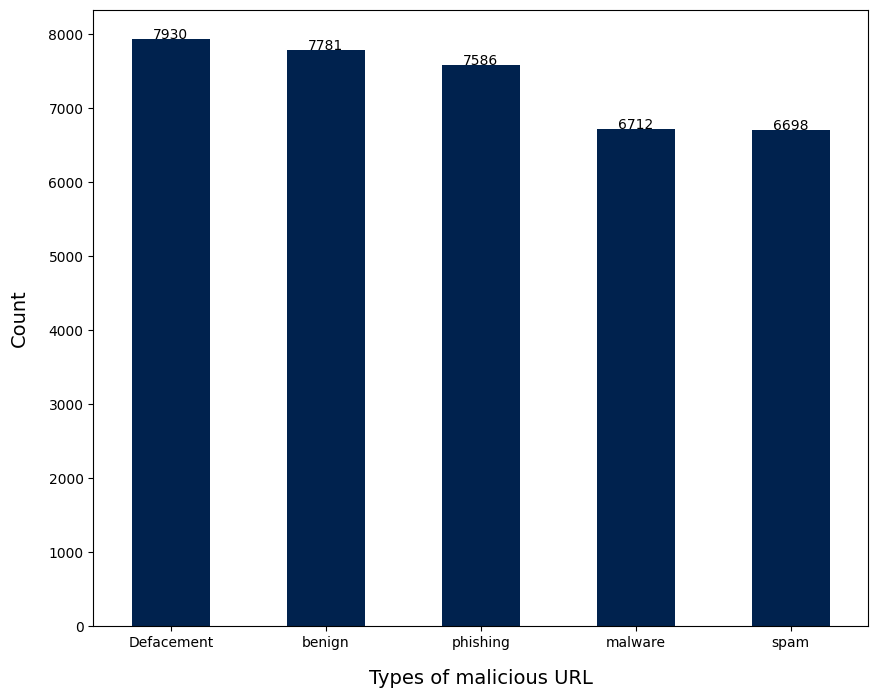

In [ ]:
def addlabels(x ,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', fontsize=10)

plt_df = df[Y_FEATURE].value_counts().sort_values(ascending=False)

plt_df.plot(kind='bar', figsize=(10, 8), rot=0, cmap='cividis')

plt.xlabel("Types of malicious URL", labelpad=14, fontsize=14)
plt.ylabel("Count", labelpad=14, fontsize=14)

addlabels(plt_df.index, plt_df.values)

#### Explore for null and na values

In [ ]:
df.columns[df.isnull().any()].tolist()

['avgpathtokenlen',
 'NumberRate_DirectoryName',
 'NumberRate_FileName',
 'NumberRate_Extension',
 'NumberRate_AfterPath',
 'Entropy_DirectoryName',
 'Entropy_Filename',
 'Entropy_Extension',
 'Entropy_Afterpath']

In [ ]:
df[df.columns[df.isna().any()]]

,avgpathtokenlen,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
0,4.400000,0.000000,0.066667,1.000000,-1.000000,0.894886,0.850608,NaN,-1.000000
1,6.000000,0.000000,0.000000,NaN,-1.000000,0.814725,0.859793,0.000000,-1.000000
2,5.800000,0.000000,0.000000,NaN,-1.000000,0.814725,0.801880,0.000000,-1.000000
3,5.500000,0.000000,0.000000,NaN,-1.000000,0.814725,0.663210,0.000000,-1.000000
4,7.333334,0.000000,0.000000,NaN,-1.000000,0.814725,0.804526,0.000000,-1.000000
...,...,...,...,...,...,...,...,...,...
36702,3.666667,0.064516,0.529412,0.627907,0.066667,0.777498,0.690227,0.656684,0.796205
36703,8.461538,0.000000,0.187500,0.200000,-1.000000,0.879588,0.674400,0.674671,-1.000000
36704,3.375000,0.073171,0.377778,0.418033,0.029412,0.684777,0.713622,0.717187,0.705245
36705,3.600000,0.000000,0.284091,0.333333,0.418182,0.871049,0.745932,0.758824,0.790772


#### Data Cleaning and Preparation

Based on the data exploration, we created a Loader that will handle the loading, cleaning and preparation of data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest

In [ ]:
data = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      36707 non-null  int64  
 1   domain_token_count               36707 non-null  int64  
 2   path_token_count                 36707 non-null  int64  
 3   avgdomaintokenlen                36707 non-null  float64
 4   longdomaintokenlen               36707 non-null  int64  
 5   avgpathtokenlen                  36427 non-null  float64
 6   tld                              36707 non-null  int64  
 7   charcompvowels                   36707 non-null  int64  
 8   charcompace                      36707 non-null  int64  
 9   ldl_url                          36707 non-null  int64  
 10  ldl_domain                       36707 non-null  int64  
 11  ldl_path                         36707 non-null  int64  
 12  ldl_filename      

In [ ]:
data['avgpathtokenlen'] = data['avgpathtokenlen'].fillna(data['avgpathtokenlen'].mean())
data['NumberRate_DirectoryName'] = data['NumberRate_DirectoryName'].fillna(data['NumberRate_DirectoryName'].mean())
data['NumberRate_FileName'] = data['NumberRate_FileName'].fillna(data['NumberRate_FileName'].mean())
data['NumberRate_Extension'] = data['NumberRate_Extension'].fillna(data['NumberRate_Extension'].mean())
data['NumberRate_AfterPath'] = data['NumberRate_AfterPath'].fillna(data['NumberRate_AfterPath'].mean())
data['Entropy_DirectoryName'] = data['Entropy_DirectoryName'].fillna(data['Entropy_DirectoryName'].mean())
data['Entropy_Filename'] = data['Entropy_Filename'].fillna(data['Entropy_Filename'].mean())
data['Entropy_Extension'] = data['Entropy_Extension'].fillna(data['Entropy_Extension'].mean())
data['Entropy_Afterpath'] = data['Entropy_Afterpath'].fillna(data['Entropy_Afterpath'].mean())


In [ ]:
data = data.drop("argPathRatio", axis=1)

In [ ]:
le = LabelEncoder()

In [ ]:
data['URL_Type_obf_Type'] = le.fit_transform(data['URL_Type_obf_Type'])

In [ ]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(data.loc[:, data.columns != 'URL_Type_obf_Type']), columns=data.columns[:-1] )
y = data['URL_Type_obf_Type']

In [ ]:
iso_forest = IsolationForest(contamination=0.01, random_state=42).fit(X)

In [ ]:
y_pred_iso_forest = iso_forest.predict(X)
X_new, y_new = X[(y_pred_iso_forest != -1)], y[(y_pred_iso_forest != -1)]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(25437, 78)
(25437,)


In [ ]:
RANDOM_STATE=42
MAX_ITER=1000

In [ ]:
import xgboost as xgb

# Create an XGBoost classifier
model = xgb.XGBClassifier(random_state=RANDOM_STATE, max_depth=MAX_DEPTH, n_estimators=MAX_ITER)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (example: accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9829389102916896


Accuracy: 0.9829389102916896
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2430
           1       0.99      0.99      0.99      2340
           2       0.99      0.98      0.98      1955
           3       0.95      0.97      0.96      2270
           4       0.99      0.99      0.99      1907

    accuracy                           0.98     10902
   macro avg       0.98      0.98      0.98     10902
weighted avg       0.98      0.98      0.98     10902

Confusion Matrix:
[[2393    2    0   34    1]
 [   0 2318    5   15    2]
 [   0    5 1913   36    1]
 [  15   20   12 2208   15]
 [   3    0    0   20 1884]]


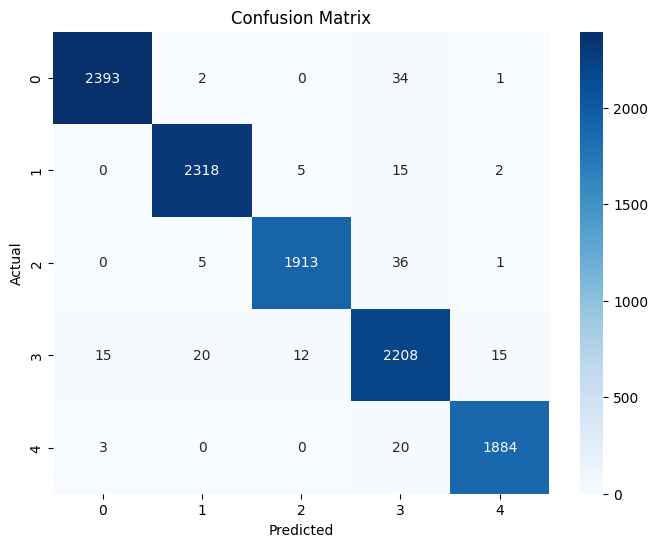

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Optionally visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Random Forest Accuracy: 0.9308383782792148
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      2430
           1       0.91      0.98      0.95      2340
           2       0.98      0.87      0.92      1955
           3       0.83      0.94      0.88      2270
           4       0.98      0.94      0.96      1907

    accuracy                           0.93     10902
   macro avg       0.94      0.93      0.93     10902
weighted avg       0.94      0.93      0.93     10902

Random Forest Confusion Matrix:
[[2228   33   10  155    4]
 [   3 2304    2   24    7]
 [   5   97 1702  146    5]
 [  22   90   15 2128   15]
 [  16    1    5   99 1786]]


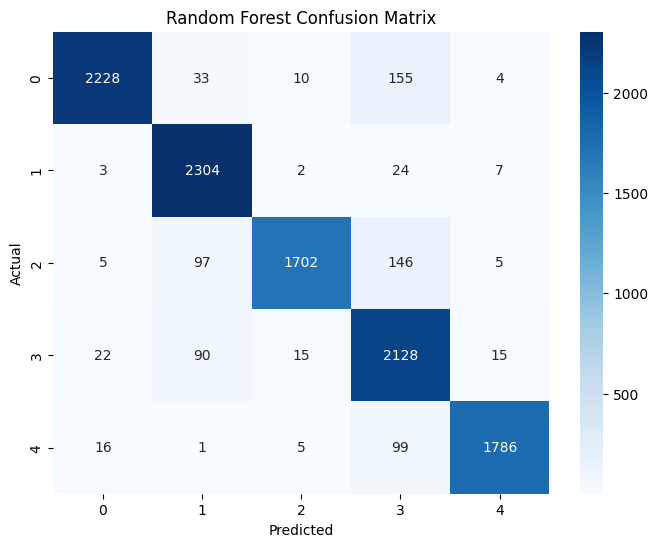

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=RANDOM_STATE, max_depth=MAX_DEPTH, n_estimators=MAX_ITER)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

# Generate a classification report
print(classification_report(y_test, rf_y_pred))

# Generate a confusion matrix
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)

# Optionally visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

Random Forest Accuracy: 0.9308383782792148
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      2430
           1       0.91      0.98      0.95      2340
           2       0.98      0.87      0.92      1955
           3       0.83      0.94      0.88      2270
           4       0.98      0.94      0.96      1907

    accuracy                           0.93     10902
   macro avg       0.94      0.93      0.93     10902
weighted avg       0.94      0.93      0.93     10902

Random Forest Confusion Matrix:
[[2228   33   10  155    4]
 [   3 2304    2   24    7]
 [   5   97 1702  146    5]
 [  22   90   15 2128   15]
 [  16    1    5   99 1786]]


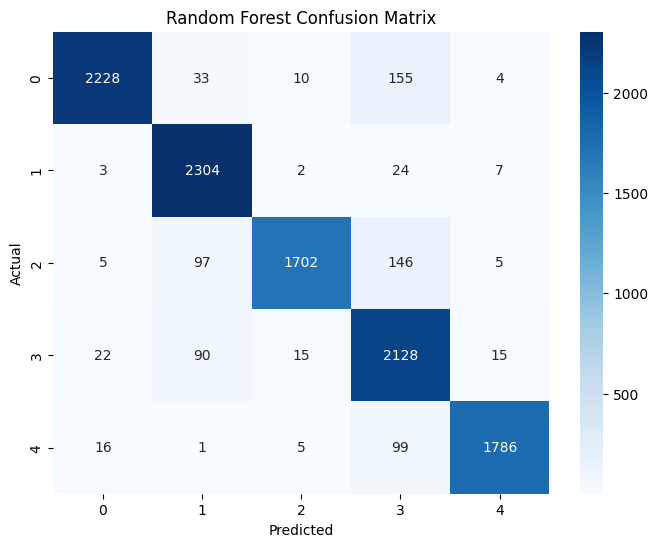

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=RANDOM_STATE, max_depth=MAX_DEPTH, n_estimators=MAX_ITER)

rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

print(classification_report(y_test, rf_y_pred))

rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)

# Optionally visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

Decision Tree Accuracy: 0.8979086406164006
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2430
           1       0.92      0.93      0.93      2340
           2       0.87      0.88      0.87      1955
           3       0.82      0.87      0.84      2270
           4       0.95      0.93      0.94      1907

    accuracy                           0.90     10902
   macro avg       0.90      0.90      0.90     10902
weighted avg       0.90      0.90      0.90     10902

Decision Tree Confusion Matrix:
[[2140   42   27  194   27]
 [   7 2176  101   35   21]
 [  36   51 1721  129   18]
 [  56   88  108 1984   34]
 [  27    1   26   85 1768]]


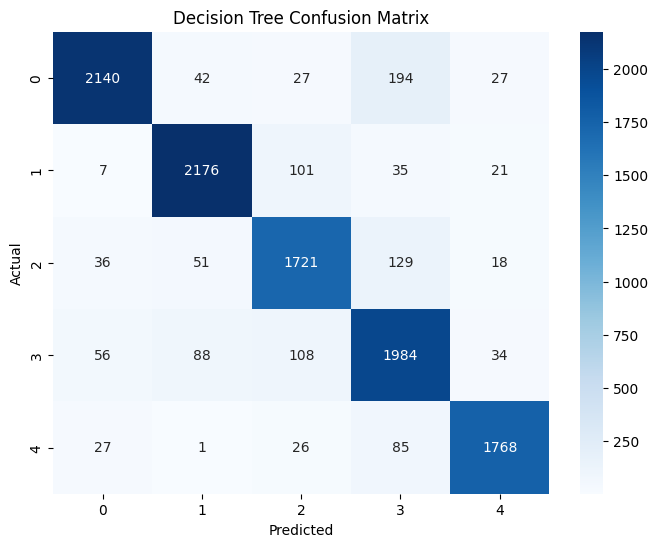

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=MAX_DEPTH)

dt_model.fit(X_train, y_train)

dt_y_pred = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}")

print(classification_report(y_test, dt_y_pred))

dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
print("Decision Tree Confusion Matrix:")
print(dt_conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8458
[LightGBM] [Info] Number of data points in the train set: 25437, number of used features: 76
[LightGBM] [Info] Start training from score -1.531457
[LightGBM] [Info] Start training from score -1.542242
[LightGBM] [Info] Start training from score -1.676588
[LightGBM] [Info] Start training from score -1.566236
[LightGBM] [Info] Start training from score -1.748483
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

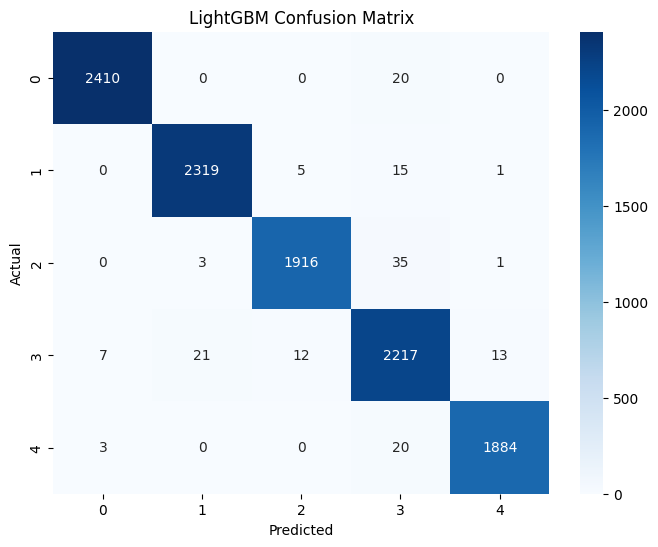

In [ ]:
!pip install lightgbm

import lightgbm as lgb

# Create a LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=RANDOM_STATE, max_depth=MAX_DEPTH, n_estimators=MAX_ITER)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
lgb_y_pred = lgb_model.predict(X_test)

# Evaluate the model
lgb_accuracy = accuracy_score(y_test, lgb_y_pred)
print(f"LightGBM Accuracy: {lgb_accuracy}")

# Generate a classification report
print(classification_report(y_test, lgb_y_pred))

# Generate a confusion matrix
lgb_conf_matrix = confusion_matrix(y_test, lgb_y_pred)
print("LightGBM Confusion Matrix:")
print(lgb_conf_matrix)

# Optionally visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lgb_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LightGBM Confusion Matrix")
plt.show()

In [ ]:

model_metrics = {
    'Model': ['XGBoost', 'Random Forest', 'Decision Tree', 'LightGBM'],
    'Accuracy': [accuracy, rf_accuracy, dt_accuracy, lgb_accuracy]
    # Add other metrics as needed (precision, recall, F1-score, etc.)
}

metrics_df = pd.DataFrame(model_metrics)
metrics_df

,Model,Accuracy
0,XGBoost,0.982939
1,Random Forest,0.930838
2,Decision Tree,0.897909
3,LightGBM,0.985691


# Part 2 Modeling

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import joblib

In [5]:
file_path = "ISCX-URL2016_All.csv"  # Replace with your dataset path
df = pd.read_csv(file_path)

In [ ]:
df.columns

Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathToken

In [ ]:
# import re
# import string
# from urllib.parse import urlparse

# def extract_features_from_url(url):
#     def is_ip_address(domain):
#         return bool(re.match(r"^\d{1,3}(\.\d{1,3}){3}$", domain))

#     def compute_entropy(s):
#         """Compute the Shannon entropy of a string"""
#         from collections import Counter
#         import math
#         count = Counter(s)
#         length = len(s)
#         return -sum((count[ch] / length) * math.log2(count[ch] / length) for ch in count)

#     parsed_url = urlparse(url)
#     domain = parsed_url.netloc
#     path = parsed_url.path
#     query = parsed_url.query

#     # Extract domain tokens
#     domain_tokens = domain.split('.')
#     path_tokens = path.split('/')

#     features = {
#         'Querylength': len(query),
#         'domain_token_count': len(domain_tokens),
#         'path_token_count': len(path_tokens),
#         'avgdomaintokenlen': sum(len(token) for token in domain_tokens) / len(domain_tokens) if domain_tokens else 0,
#         'longdomaintokenlen': max(len(token) for token in domain_tokens) if domain_tokens else 0,
#         'avgpathtokenlen': sum(len(token) for token in path_tokens) / len(path_tokens) if path_tokens else 0,
#         'tld': domain_tokens[-1] if domain_tokens else '',
#         'charcompvowels': sum(ch in 'aeiouAEIOU' for ch in url),
#         'charcompace': sum(ch in string.ascii_letters for ch in url),
#         'ldl_url': len(url),
#         'ldl_domain': len(domain),
#         'ldl_path': len(path),

#         'ldl_filename': len(parsed_url.path.split('/')[-1]),
#         'ldl_getArg': len(query),
#         'urlLen': len(url),
#         'domainlength': len(domain),
#         'pathLength': len(path),
#         'subDirLen': len('/'.join(path_tokens[:-1])),
#         'fileNameLen': len(parsed_url.path.split('/')[-1]),
#         'ArgLen': len(query),
#         'pathurlRatio': len(path) / len(url) if url else 0,
#         'ArgUrlRatio': len(query) / len(url) if url else 0,
#         'argDomanRatio': len(query) / len(domain) if domain else 0,
#         'domainUrlRatio': len(domain) / len(url) if url else 0,
#         'pathDomainRatio': len(path) / len(domain) if domain else 0,
#         'argPathRatio': len(query) / len(path) if path else 0,
#         'executable': parsed_url.path.endswith(('.exe', '.bat', '.sh', '.msi')),
#         'isPortEighty': parsed_url.port in (80, None),
#         'NumberofDotsinURL': url.count('.'),
#         'ISIpAddressInDomainName': is_ip_address(domain),
#         'CharacterContinuityRate': len(max(re.findall(r'[a-zA-Z0-9]+', url), key=len, default='')) / len(url) if url else 0,
#         'LongestVariableValue': max((len(val) for val in query.split('&')), default=0),
#         'URL_DigitCount': sum(ch.isdigit() for ch in url),
#         'host_DigitCount': sum(ch.isdigit() for ch in domain),
#         'Directory_DigitCount': sum(ch.isdigit() for ch in path),
#         'File_name_DigitCount': sum(ch.isdigit() for ch in parsed_url.path.split('/')[-1]),
#         'Extension_DigitCount': sum(ch.isdigit() for ch in parsed_url.path.split('.')[-1]),
#         'Query_DigitCount': sum(ch.isdigit() for ch in query),
#         'URL_Letter_Count': sum(ch.isalpha() for ch in url),
#         'host_letter_count': sum(ch.isalpha() for ch in domain),
#         'Directory_LetterCount': sum(ch.isalpha() for ch in path),
#         'Filename_LetterCount': sum(ch.isalpha() for ch in parsed_url.path.split('/')[-1]),
#         'Extension_LetterCount': sum(ch.isalpha() for ch in parsed_url.path.split('.')[-1]),
#         'Query_LetterCount': sum(ch.isalpha() for ch in query),
#         'LongestPathTokenLength': max((len(token) for token in path_tokens), default=0),
#         'Domain_LongestWordLength': max((len(token) for token in domain_tokens), default=0),
#         'Path_LongestWordLength': max((len(token) for token in path_tokens), default=0),
#         'sub-Directory_LongestWordLength': max((len(token) for token in path_tokens[:-1]), default=0),
#         'Arguments_LongestWordLength': max((len(arg.split('=')[-1]) for arg in query.split('&')), default=0),
#         'URL_sensitiveWord': any(word in url for word in ['admin', 'login', 'password']),
#         'URLQueries_variable': len(query.split('&')),
#         'spcharUrl': sum(ch in string.punctuation for ch in url),
#         'delimeter_Domain': domain.count('.'),
#         'delimeter_path': path.count('/'),
#         'delimeter_Count': url.count('/') + url.count('.') + url.count('?'),
#         'NumberRate_URL': sum(ch.isdigit() for ch in url) / len(url) if url else 0,
#         'NumberRate_Domain': sum(ch.isdigit() for ch in domain) / len(domain) if domain else 0,
#         'NumberRate_DirectoryName': sum(ch.isdigit() for ch in path) / len(path) if path else 0,
#         'NumberRate_FileName': sum(ch.isdigit() for ch in parsed_url.path.split('/')[-1]) / len(parsed_url.path.split('/')[-1]) if parsed_url.path.split('/')[-1] else 0,
#         'NumberRate_Extension': sum(ch.isdigit() for ch in parsed_url.path.split('.')[-1]) / len(parsed_url.path.split('.')[-1]) if parsed_url.path.split('.')[-1] else 0,
#         'NumberRate_AfterPath': sum(ch.isdigit() for ch in query) / len(query) if query else 0,
#         'SymbolCount_URL': sum(ch in string.punctuation for ch in url),
#         'SymbolCount_Domain': sum(ch in string.punctuation for ch in domain),
#         'SymbolCount_Directoryname': sum(ch in string.punctuation for ch in path),
#         'SymbolCount_FileName': sum(ch in string.punctuation for ch in parsed_url.path.split('/')[-1]),
#         'SymbolCount_Extension': sum(ch in string.punctuation for ch in parsed_url.path.split('.')[-1]),
#         'SymbolCount_Afterpath': sum(ch in string.punctuation for ch in query),
#         'Entropy_URL': compute_entropy(url),
#         'Entropy_Domain': compute_entropy(domain),
#         'Entropy_DirectoryName': compute_entropy(path),
#         'Entropy_Filename': compute_entropy(parsed_url.path.split('/')[-1]),
#         'Entropy_Extension': compute_entropy(parsed_url.path.split('.')[-1]),
#         'Entropy_Afterpath': compute_entropy(query),
#     }
#     return features

# # Example usage
# url = "http://example.com/path/to/file.php?arg1=value1&arg2=value2"
# features = extract_features_from_url(url)
# print(features)


In [6]:
df = df[['Querylength', 'domain_token_count', 'path_token_count',
         'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen',
         'URL_Type_obf_Type']].copy()

In [7]:
df = df.dropna()

In [8]:
df['URL_Type_obf_Type'].value_counts()

,count
URL_Type_obf_Type,
Defacement,7930
benign,7774
phishing,7322
malware,6708
spam,6693


In [12]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['URL_Type_obf_Type'])

In [13]:
X = df.drop(columns=['URL_Type_obf_Type', 'label'])
y = df['label']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
!pip install lightgbm xgboost --quiet


In [16]:
model_metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Function to evaluate a model and append its scores to the DataFrame
def evaluate_and_store_metrics(model_name, y_true, y_pred, metrics_df):
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted')
    }
    # Append the metrics to the DataFrame
    return metrics_df._append(metrics, ignore_index=True)

XGBoost Accuracy: 0.9240552658065697
XGBoost Precision: 0.9243944893829805
XGBoost Recall: 0.9240552658065697
XGBoost F1 Score: 0.9240987591551076

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2424
           1       0.90      0.94      0.92      2326
           2       0.91      0.89      0.90      2004
           3       0.87      0.86      0.87      2108
           4       0.98      0.97      0.97      2067

    accuracy                           0.92     10929
   macro avg       0.92      0.92      0.92     10929
weighted avg       0.92      0.92      0.92     10929


XGBoost Confusion Matrix:
[[2305   34    7   69    9]
 [   9 2180   90   45    2]
 [   9   85 1789  115    6]
 [  63  128   73 1822   22]
 [  12    5   11   36 2003]]


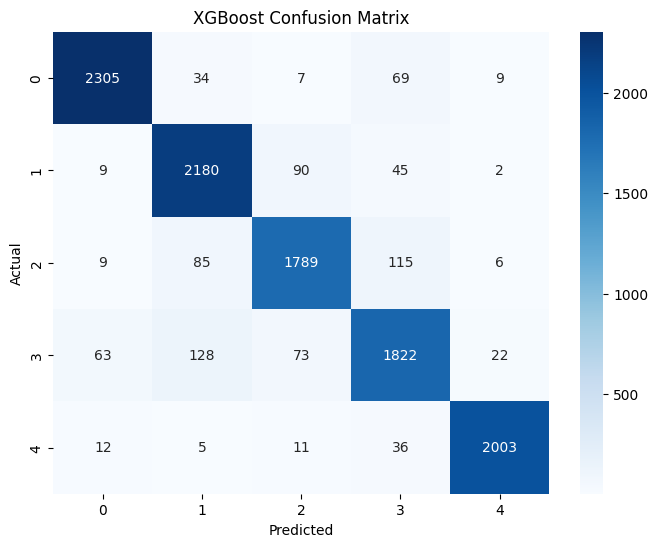

In [15]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred, average="weighted")
xgb_recall = recall_score(y_test, xgb_y_pred, average="weighted")
xgb_f1 = f1_score(y_test, xgb_y_pred, average="weighted")

print(f"XGBoost Accuracy: {xgb_accuracy}")
print(f"XGBoost Precision: {xgb_precision}")
print(f"XGBoost Recall: {xgb_recall}")
print(f"XGBoost F1 Score: {xgb_f1}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, xgb_y_pred))

# Confusion matrix
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)
print("\nXGBoost Confusion Matrix:")
print(xgb_conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()


In [17]:
model_metrics_df = evaluate_and_store_metrics('XGBoost', y_test, xgb_y_pred, model_metrics_df)

<ipython-input-16-b177218f706a>:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return metrics_df._append(metrics, ignore_index=True)


In [18]:
model_metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,XGBoost,0.924055,0.924394,0.924055,0.924099


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 25498, number of used features: 6
[LightGBM] [Info] Start training from score -1.532762
[LightGBM] [Info] Start training from score -1.543351
[LightGBM] [Info] Start training from score -1.690187
[LightGBM] [Info] Start training from score -1.587253
[LightGBM] [Info] Start training from score -1.706907
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Accuracy: 0.9329307347424284
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2424
       

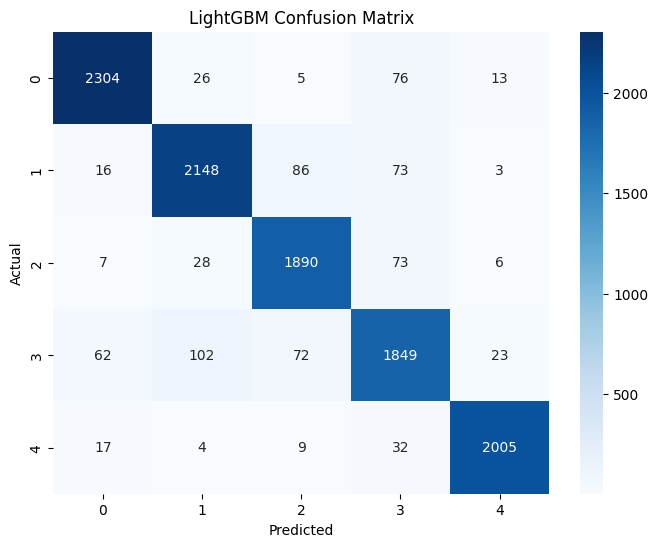

In [19]:
# Create a LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=RANDOM_STATE, max_depth=MAX_DEPTH, n_estimators=MAX_ITER)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
lgb_y_pred = lgb_model.predict(X_test)

# Evaluate the model
lgb_accuracy = accuracy_score(y_test, lgb_y_pred)
print(f"LightGBM Accuracy: {lgb_accuracy}")

# Generate a classification report
print(classification_report(y_test, lgb_y_pred))

# Generate a confusion matrix
lgb_conf_matrix = confusion_matrix(y_test, lgb_y_pred)
print("LightGBM Confusion Matrix:")
print(lgb_conf_matrix)

# Optionally visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lgb_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LightGBM Confusion Matrix")
plt.show()

In [20]:
model_metrics_df = evaluate_and_store_metrics('LGBM', y_test, lgb_y_pred, model_metrics_df)

In [21]:
model_metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,XGBoost,0.924055,0.924394,0.924055,0.924099
1,LGBM,0.932931,0.933100,0.932931,0.932971


Random Forest Accuracy: 0.9284472504346235
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2424
           1       0.93      0.92      0.93      2326
           2       0.91      0.94      0.93      2004
           3       0.87      0.87      0.87      2108
           4       0.98      0.96      0.97      2067

    accuracy                           0.93     10929
   macro avg       0.93      0.93      0.93     10929
weighted avg       0.93      0.93      0.93     10929

Random Forest Confusion Matrix:
[[2307   23    8   76   10]
 [  19 2148   88   70    1]
 [   7   29 1882   83    3]
 [  85   99   72 1830   22]
 [  23    3   12   49 1980]]


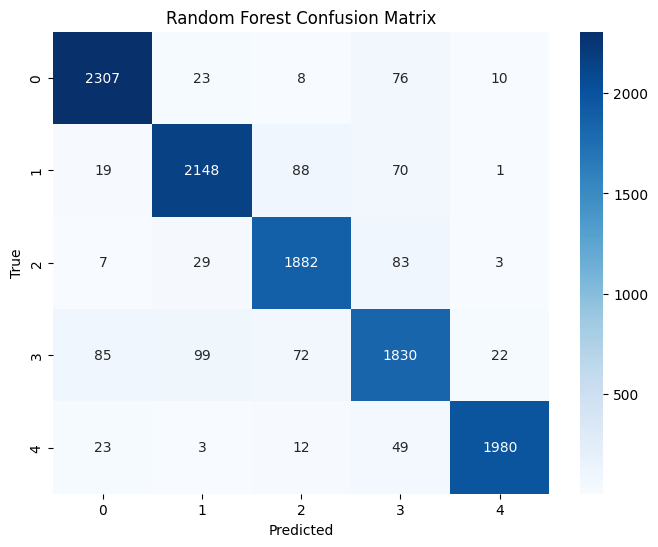

In [22]:
from sklearn.ensemble import RandomForestClassifier


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

print(classification_report(y_test, rf_predictions))

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
print("Random Forest Confusion Matrix:")
print(rf_cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [23]:
model_metrics_df = evaluate_and_store_metrics('Random Forest', y_test, rf_predictions, model_metrics_df)

In [24]:
model_metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,XGBoost,0.924055,0.924394,0.924055,0.924099
1,LGBM,0.932931,0.933100,0.932931,0.932971
2,Random Fores,0.928447,0.928766,0.928447,0.928535


Decision Tree Accuracy: 0.9095068167261414
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2424
           1       0.92      0.89      0.91      2326
           2       0.89      0.94      0.91      2004
           3       0.84      0.82      0.83      2108
           4       0.96      0.95      0.96      2067

    accuracy                           0.91     10929
   macro avg       0.91      0.91      0.91     10929
weighted avg       0.91      0.91      0.91     10929

Decision Tree Confusion Matrix:
[[2272   27   17   95   13]
 [  29 2074  108  108    7]
 [   8   34 1882   72    8]
 [ 109  112  101 1739   47]
 [  31    5   13   45 1973]]


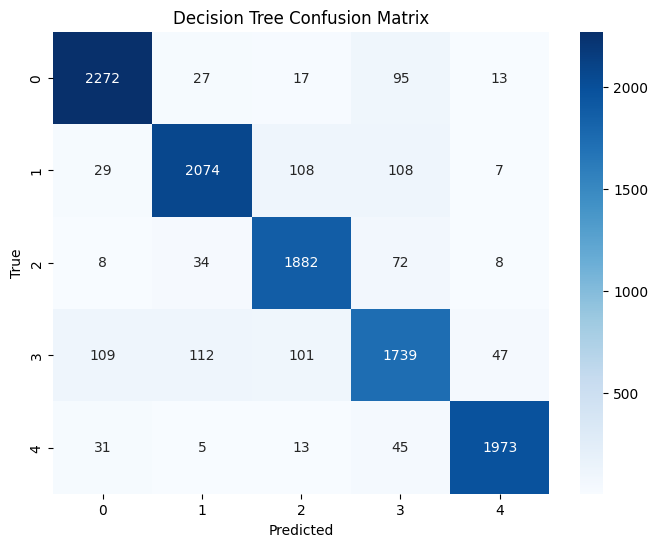

In [25]:

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_classifier.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")

print(classification_report(y_test, dt_predictions))

# Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_predictions)
print("Decision Tree Confusion Matrix:")
print(dt_cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [26]:
model_metrics_df = evaluate_and_store_metrics('Decision Tree', y_test, dt_predictions, model_metrics_df)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6122243572147498
              precision    recall  f1-score   support

           0       0.55      0.58      0.56      2424
           1       0.65      0.83      0.73      2326
           2       0.61      0.29      0.40      2004
           3       0.59      0.63      0.61      2108
           4       0.66      0.70      0.68      2067

    accuracy                           0.61     10929
   macro avg       0.61      0.61      0.60     10929
weighted avg       0.61      0.61      0.60     10929

Logistic Regression Confusion Matrix:
[[1395  249   70  222  488]
 [  98 1934  100  124   70]
 [ 342  597  590  429   46]
 [ 244  185  202 1324  153]
 [ 474    0    9  136 1448]]


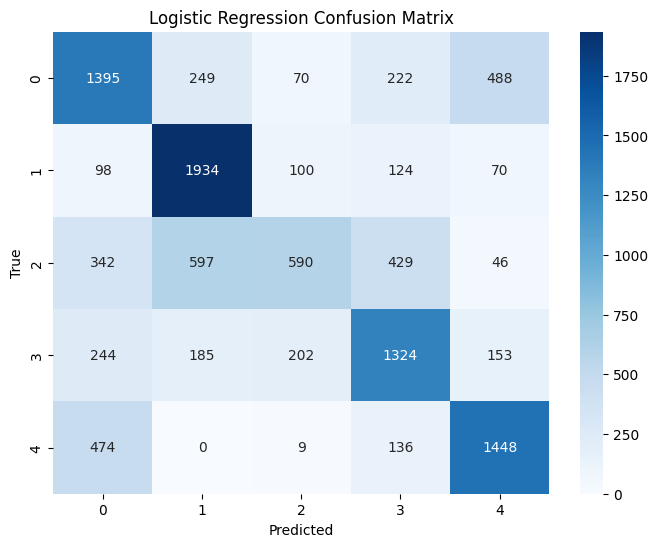

In [27]:
from sklearn.linear_model import LogisticRegression


logreg_model = LogisticRegression(max_iter=1000, random_state=42)

logreg_model.fit(X_train, y_train)

# Make predictions
logreg_predictions = logreg_model.predict(X_test)

# Evaluate the model
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print(f"Logistic Regression Accuracy: {logreg_accuracy}")

print(classification_report(y_test, logreg_predictions))

# Confusion Matrix
logreg_cm = confusion_matrix(y_test, logreg_predictions)
print("Logistic Regression Confusion Matrix:")
print(logreg_cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [28]:
model_metrics_df = evaluate_and_store_metrics('Logistic Regression', y_test, logreg_predictions, model_metrics_df)

In [30]:
model_metrics_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score
1,LGBM,0.932931,0.933100,0.932931,0.932971
2,Random Fores,0.928447,0.928766,0.928447,0.928535
0,XGBoost,0.924055,0.924394,0.924055,0.924099
3,Decision Tree,0.909507,0.909583,0.909507,0.909328
4,Logistic Regression,0.612224,0.609893,0.612224,0.598467


<ipython-input-40-727b5b53e930>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=model_metrics_df, palette='viridis')


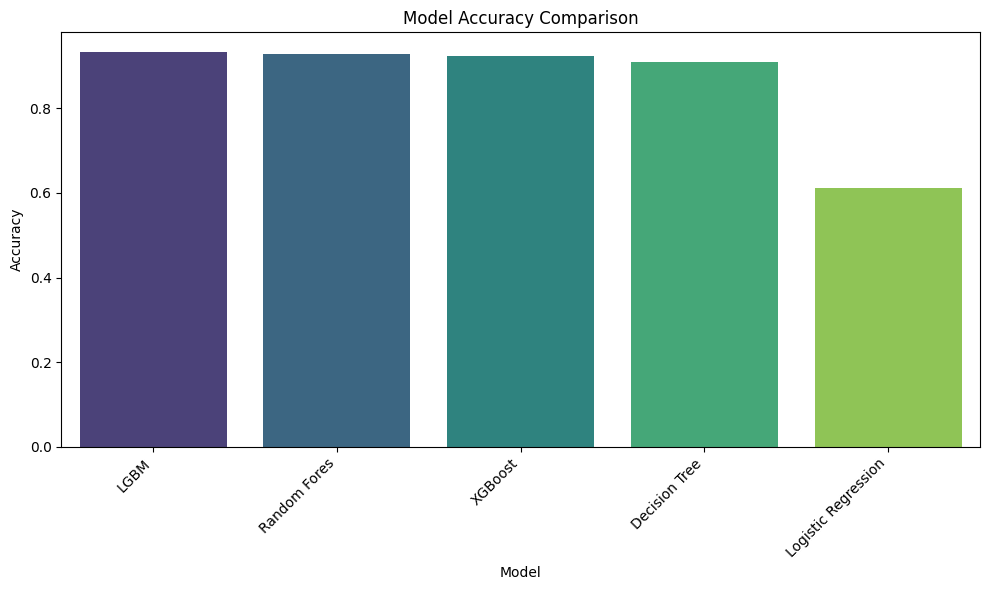

<ipython-input-40-727b5b53e930>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=model_metrics_df, palette='viridis')


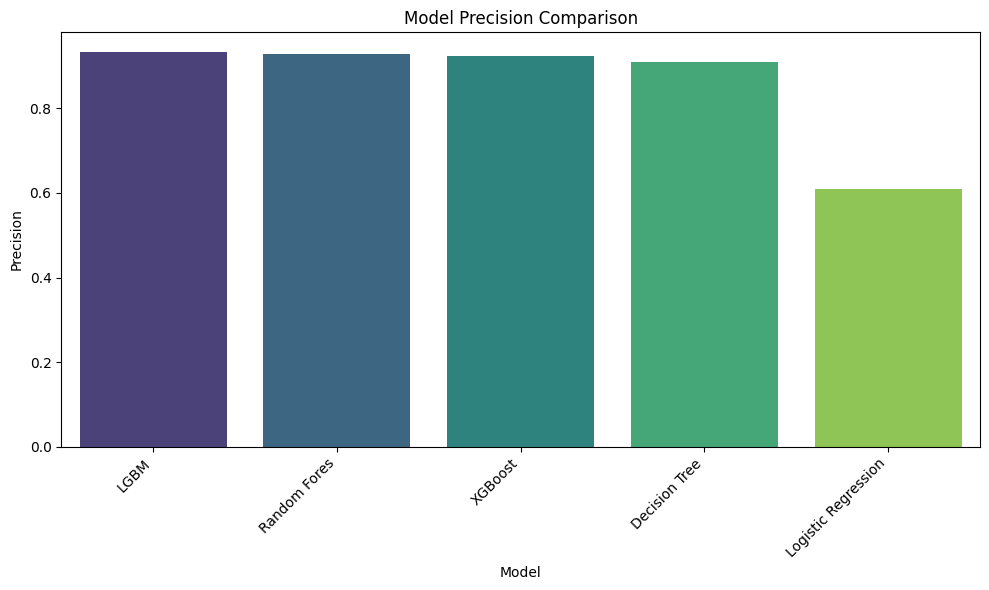

<ipython-input-40-727b5b53e930>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=model_metrics_df, palette='viridis')


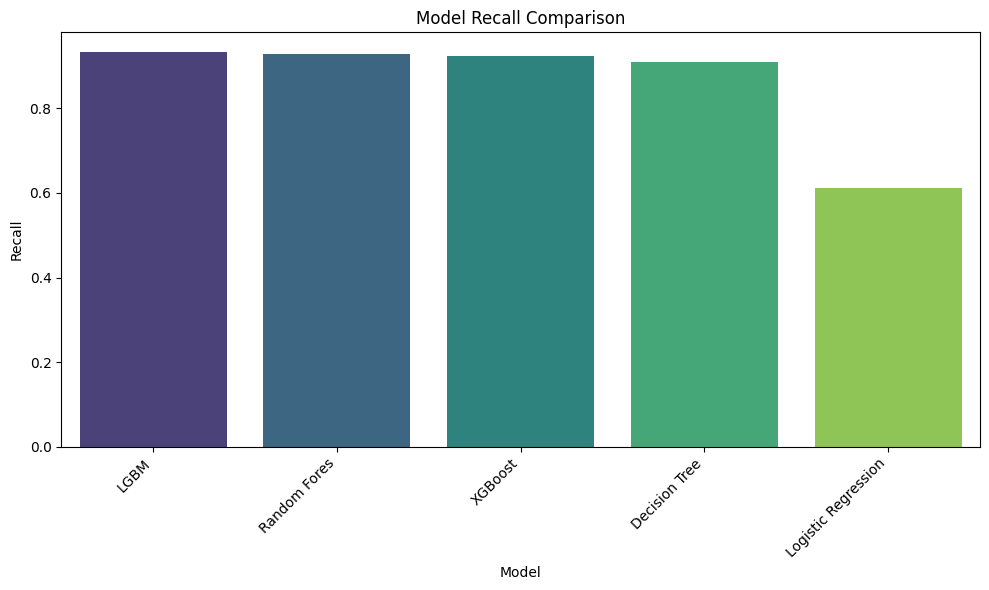

<ipython-input-40-727b5b53e930>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-Score', data=model_metrics_df, palette='viridis')


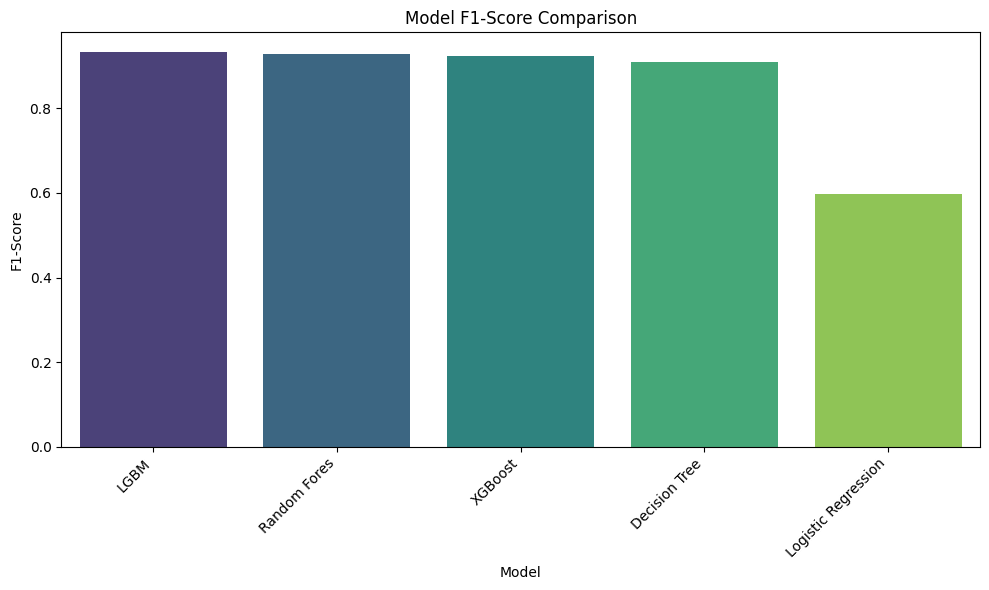

In [40]:
# prompt: create a plot for model_metrics_df

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=model_metrics_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', data=model_metrics_df, palette='viridis')
plt.title('Model Precision Comparison')
plt.ylabel('Precision')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', data=model_metrics_df, palette='viridis')
plt.title('Model Recall Comparison')
plt.ylabel('Recall')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', data=model_metrics_df, palette='viridis')
plt.title('Model F1-Score Comparison')
plt.ylabel('F1-Score')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
# prompt: create a pretty table for model_metrics_df

from IPython.display import HTML, display
import pandas as pd

def pretty_print_dataframe(df):
    # Convert the DataFrame to HTML with styling
    styled_df = df.style.set_properties(**{'text-align': 'center'}) \
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]) \
        .background_gradient(cmap='Blues', axis=0)  # Add a color gradient

    # Display the styled DataFrame
    display(HTML(styled_df.to_html()))

pretty_print_dataframe(model_metrics_df)

,Model,Accuracy,Precision,Recall,F1-Score
1,LGBM,0.932931,0.933100,0.932931,0.932971
2,Random Fores,0.928447,0.928766,0.928447,0.928535
0,XGBoost,0.924055,0.924394,0.924055,0.924099
3,Decision Tree,0.909507,0.909583,0.909507,0.909328
4,Logistic Regression,0.612224,0.609893,0.612224,0.598467


<ipython-input-31-536fbed5daa0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=model_metrics_df, palette='viridis')


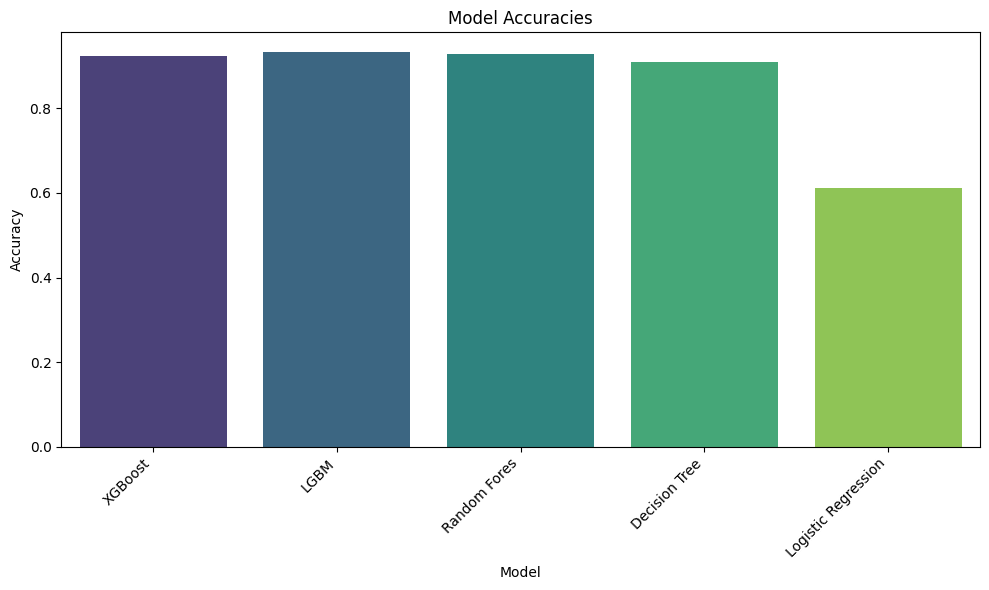

In [31]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=model_metrics_df, palette='viridis')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [33]:
def classify_url(url):

    url_features = {
        'Querylength': len(url),
        'domain_token_count': url.count('.'),
        'path_token_count': url.count('/'),
        'avgdomaintokenlen': np.mean([len(t) for t in url.split('.') if t]),
        'longdomaintokenlen': max([len(t) for t in url.split('.') if t]),
        'avgpathtokenlen': np.mean([len(t) for t in url.split('/') if t]),
    }
    url_gb = np.array([list(url_features.values())])

    xgb_pred = lgb_model.predict(url_gb)[0]

    return label_encoder.inverse_transform([xgb_pred])[0]

In [35]:
for url in ['www.kaggle.com', "http://1927.co/xgrid%20"]:
    print(classify_url(url))

benign
phishing


In [37]:

import joblib
joblib.dump(lgb_model, 'lgb_model.pkl')


['lgb_model.pkl']